In [2]:
import tensorflow as tf
import numpy as np

#-------------------------------------------------- 危险操作 ----------------------------------------------------------#
#######################################################################################################################
# 注意: 每次调用都要重启 Notebook 内核 (快捷键: 00 - 连续按两次数字 0 )
#######################################################################################################################
# 手动构建静态图需要手动关闭 Eager Execution
tf.compat.v1.disable_eager_execution()


# 手动构建静态图
x = tf.compat.v1.placeholder(tf.int32, name='x_input')
y = tf.compat.v1.placeholder(tf.int32, name='y_input')
b = tf.Variable(1, name='b')
x_y = tf.multiply(x, y)
xy = tf.matmul(x, y)
output = tf.add(xy, b, name='output_1')
output_2 = tf.add(x_y, b, name='output_2')

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    y_pred = sess.run([output, output_2], {x: [[10, 5],[11, 6]], y: [[3, 8],[2, 1]]})

print('-'*8, '计算图', '-'*8)    
print('矩阵点积:\n', np.array(y_pred[0]))
print('哈达玛积:\n', np.array(y_pred[1]))

x = np.array([[10, 5],[11, 6]])
y = np.array([[3, 8],[2, 1]])
b = np.ones((2,2))

ret = x.dot(y)

print('-'*8, '常规计算', '-'*8) 
print('矩阵点积:\n', ret + b)
print('哈达玛积:\n', x * y + b)

# | 10  5 | o | 3  8 | = | 30  40 |
# | 11  6 |   | 2  1 |   | 22   6 |

# | 10  5 | x | 3  8 | = | 40  85 |
# | 11  6 |   | 2  1 |   | 45  94 |

-------- 计算图 --------
矩阵点积:
 [[41 86]
 [46 95]]
哈达玛积:
 [[31 41]
 [23  7]]
-------- 常规计算 --------
矩阵点积:
 [[41. 86.]
 [46. 95.]]
哈达玛积:
 [[31. 41.]
 [23.  7.]]


X:  tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]
 [ 0.70710677]
 [ 1.4142135 ]], shape=(5, 1), dtype=float32)
Y:  tf.Tensor(
[[-1.5596257]
 [-0.5198752]
 [ 0.       ]
 [ 0.7798129]
 [ 1.2996881]], shape=(5, 1), dtype=float32)


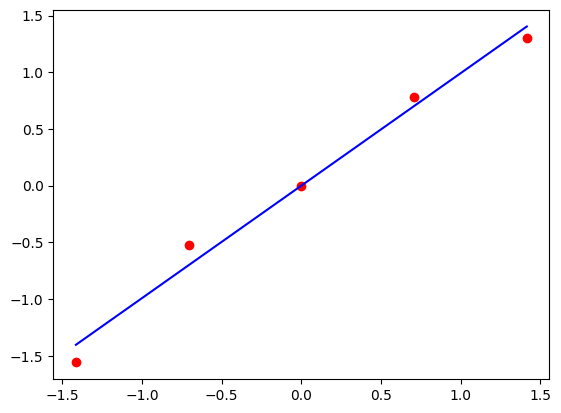

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
import sklearn
from sklearn.preprocessing import StandardScaler

std_scaler_x = StandardScaler()
std_scaler_y = StandardScaler()

x_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype = np.float32).reshape(-1,1)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype = np.float32).reshape(-1,1)

#归一化
x_ = std_scaler_x.fit_transform(x_raw)
y_ = std_scaler_y.fit_transform(y_raw)

#转化为tensorflow的张量
x = tf.constant(x_, dtype = tf.float32)
y = tf.constant(y_, dtype = tf.float32)

print('X: ', x)
print('Y: ', y)

a, b = tf.Variable(initial_value = 0.), tf.Variable(initial_value = 0.)
variables = [a, b]
num = 200
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-2)

for _ in range(num):
    with tf.GradientTape() as tape:
        #预测函数
        y_pred = a * x + b
        #损失函数
        loss = tf.reduce_sum(tf.square(y_pred - y))
        
    #对变量求导
    grads = tape.gradient(loss, variables)
    #调整参数
    optimizer.apply_gradients(grads_and_vars = zip(grads, variables))

# 用于表示输入点
plot.scatter(x, y, c='r')
# 输入 x,y 对应的公式即可
plot.plot(x, y_pred, c='b')
plot.show()

In [3]:
import numpy as np
import pandas
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, metrics
import tensorflow as tf

num_epoch = 200
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# 加载数据集
data = load_breast_cancer()
names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
         'mean smoothness', 'mean compactness', 'mean concavity',
         'mean concave points', 'mean symmetry', 'mean fractal dimension',
         'radius error', 'texture error', 'perimeter error', 'area error',
         'smoothness error', 'compactness error', 'concavity error',
         'concave points error', 'symmetry error',
         'fractal dimension error', 'worst radius', 'worst texture',
         'worst perimeter', 'worst area', 'worst smoothness',
         'worst compactness', 'worst concavity', 'worst concave iponts',
         'worst symmetry', 'worst fractal dimension']

pData = pandas.DataFrame(data.data, columns=names)
pTarget = pandas.DataFrame(data.target, columns=['target'])

# 数据标准化
scaler = StandardScaler()
sData = scaler.fit_transform(pData)

# 划分训练集和测试集
x_train, x_test, y_train, y_test = model_selection.train_test_split(sData, pTarget.values, test_size=0.3, random_state=42)

#转化为tensorflow的张量
x = tf.constant(x_train, dtype = tf.float32)
y = tf.constant(y_train, dtype = tf.float32)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = tf.keras.layers.Dense(64, activation='relu')
        self.layer2 = tf.keras.layers.Dense(64, activation='relu')
        self.layer3 = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        hidden_1 = self.layer1(inputs)
        hidden_2 = self.layer2(hidden_1)
        return self.layer3(hidden_2)

model = Model()

for _ in range(0, num_epoch):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = tf.reduce_sum(tf.square(y_pred - y))

    if num_epoch % 10 == 0:
        print('loss: ', loss)
        
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))



loss:  tf.Tensor(101.30778, shape=(), dtype=float32)
loss:  tf.Tensor(92.461624, shape=(), dtype=float32)
loss:  tf.Tensor(84.30305, shape=(), dtype=float32)
loss:  tf.Tensor(76.83088, shape=(), dtype=float32)
loss:  tf.Tensor(70.03247, shape=(), dtype=float32)
loss:  tf.Tensor(63.884647, shape=(), dtype=float32)
loss:  tf.Tensor(58.339962, shape=(), dtype=float32)
loss:  tf.Tensor(53.36585, shape=(), dtype=float32)
loss:  tf.Tensor(48.917816, shape=(), dtype=float32)
loss:  tf.Tensor(44.94301, shape=(), dtype=float32)
loss:  tf.Tensor(41.404026, shape=(), dtype=float32)
loss:  tf.Tensor(38.267212, shape=(), dtype=float32)
loss:  tf.Tensor(35.48414, shape=(), dtype=float32)
loss:  tf.Tensor(33.015095, shape=(), dtype=float32)
loss:  tf.Tensor(30.824677, shape=(), dtype=float32)
loss:  tf.Tensor(28.88738, shape=(), dtype=float32)
loss:  tf.Tensor(27.165552, shape=(), dtype=float32)
loss:  tf.Tensor(25.631754, shape=(), dtype=float32)
loss:  tf.Tensor(24.259922, shape=(), dtype=float32)

X_train: (60000, 28, 28) y_train: (60000,)
X_test: (10000, 28, 28) y_test: (10000,)
Epoch 1/5
300/300 [==============================] - 8s 24ms/step - loss: 0.2958 - accuracy: 0.9180
Epoch 2/5
300/300 [==============================] - 7s 24ms/step - loss: 0.0890 - accuracy: 0.9736
Epoch 3/5
300/300 [==============================] - 7s 23ms/step - loss: 0.0565 - accuracy: 0.9824
Epoch 4/5
300/300 [==============================] - 7s 24ms/step - loss: 0.0384 - accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       1.00      0.98      0.99      1149
           2       0.99      0.98      0.98      1033
           3       0.98      0.99      0.98      1003
           4       0.99      0.98      0.99       992
           5       0.96      0.99      0.98       863
           6       0.98      0.98      0.98       960
           7      

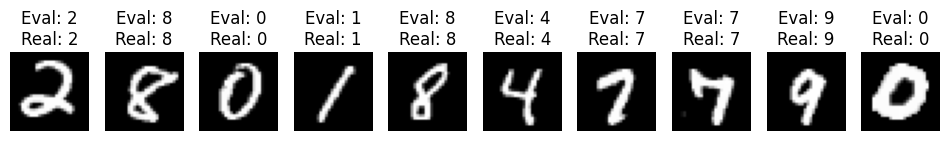

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


模型保存完毕
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 4)         184       
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 576)               1327680   
                                                                 
 dense_3 (Dense)             (None, 10)                5770      
                                                                 
Total params: 1333684 (5.09 MB)
Trainable params: 1333684 (5.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 Input:


In [2]:
# 基于 keras 的 Tensorflow 测试
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from sklearn import metrics
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.preprocessing import OneHotEncoder
import random
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("X_train:", x_train.shape, "y_train:", y_train.shape)
print("X_test:", x_test.shape, "y_test:", y_test.shape)

# # 查看测试图片
# fig, ax = plt.subplots(5, 10, figsize=(12, 8))
# for i in range(5):
#     for j in range(10):
#         ax[i, j].imshow(x_train[i*10 + j], cmap='gray')
#         ax[i, j].set_title('Label: ' + str(y_train[i*10 + j]))
#         ax[i, j].axis('off')
# plt.show()

cnnModel = models.Sequential()
# 输入(1，28,28)，输出(5,26,26)
cnnModel.add(layers.Conv2D(filters=5,kernel_size=(3,3),strides=(1,1),data_format="channels_last",input_shape=(28,28,1),activation="relu"))
# 输入(5,26,26)，输出(20,24,24)
cnnModel.add(layers.Conv2D(filters=4,kernel_size=(3,3),strides=(1,1),data_format="channels_last",input_shape=(26,26,5),activation="relu"))
# 平铺成一维向量，为(24*24*20,)
cnnModel.add(layers.Flatten())
# Dense 第一层是输出维度
cnnModel.add(layers.Dense(24*24,activation="relu", input_shape=(24*24*20,)))
# 输出十维
cnnModel.add(layers.Dense(10,activation="softmax", input_shape=(24*24,)))

cnnModel.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# 归一化
x_train = np.array(x_train/255.0)
x_test = np.array(x_test/255.0)
# 重整形状
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

# softmax 输出 (200,10), 而 y_train 最后为一维数组为 (200,), 要转换成 OneHot 编码
y_labels = np.array([i for i in range(0,10)]).reshape(-1, 1)
ohe = OneHotEncoder()
ohe.fit_transform(y_labels)

y_train = y_train.reshape(-1,1)
y_train = np.array(ohe.transform(y_train).toarray())

cnnModel.fit(x_train,y_train, epochs=5, batch_size=200)

# y_pred 形状为 (10000,10), 也就是编码后的数据
y_pred = cnnModel.predict(x_test)
y_test = np.array(ohe.transform(y_test.reshape(-1,1)).toarray())

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 模型评估参数表
print(metrics.classification_report(y_pred_classes,y_test_classes))

# 重新获取元数据
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()

# 随机抽选十个看看效果
index = []
for _ in range(0,10):
    index.append(random.randint(0,9999))

x_test = np.array(x_test/255.0)
x_eval = np.array([x_test[id] for id in index]).reshape(10,28,28)
y_eval = np.array([y_test[id] for id in index])

x_eval_format = np.reshape(x_eval,(10,28,28,1))
y_eval_format = y_eval.reshape(10,1)
y_eval_format = np.array(ohe.transform(y_eval_format).toarray())

y_pred = cnnModel.predict(x_eval_format)
y_pred_classes = np.argmax(y_pred, axis=1)

# 查看测试图片
fig, ax = plt.subplots(1, 10, figsize=(12, 10))
for i in range(0,10):
    ax[i].imshow(x_test[index[i]], cmap='gray')
    ax[i].set_title('Eval: ' + str(y_pred_classes[i]) + '\nReal: ' + str(y_eval[i]))
    ax[i].axis('off')
plt.show()

cnnModel.save('model', save_format='tf')
print('模型保存完毕')
cnnModel.summary()

model = tf.saved_model.load('model')
concrete_func = model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
print("\n Input:\n", concrete_func.inputs, "\n Output:\n", concrete_func.outputs)

for layer in cnnModel.layers:
    print(layer.name)


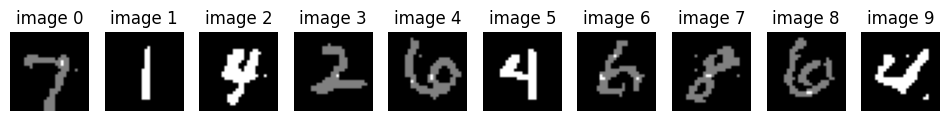

Input shape: (10, 28, 28, 1) 

Model predict result: [7, 1, 4, 2, 6, 4, 6, 8, 6, 4]


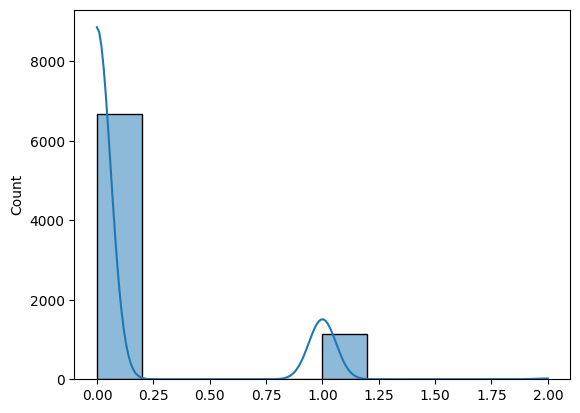

In [44]:
# 基于 keras 的 Tensorflow 测试
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

model = tf.saved_model.load('model')

img = []
# 查看测试图片
fig, ax = plt.subplots(1, 10, figsize=(12, 8))
for i in range(10):
    img.append(cv2.imread("picture/{}.jpg".format(i), cv2.IMREAD_GRAYSCALE))
    ax[i].imshow(img[i], cmap='gray')
    ax[i].set_title('image {}'.format(i))
    ax[i].axis('off')
plt.show()

input = np.array(img).reshape(10,28,28,1).astype(np.float32)
print("Input shape:", input.shape, "\n")

output = model(input)

print("Model predict result:", end=' ')
lst = []
for tensor in output:
    lst.append(np.argmax(tensor))
print(lst)

sns.histplot(np.array(img).flatten(), bins=10, kde=True)
plt.show()